<a name='0'></a>
# Tugas Kelompok 6 - DS D
# Source code : Taxis
### Predict : Fare

Find out the relationship between fare as the target/dependant variable and the independent variable

Anggota:

*  Albertman Putra Barasa
*  Siwi Budi Utami
*  Trio Widi
*  Denada

## Content
1. [Introduction](#1)
2. [Collecting the data](#2)
3. [EDA (Exploratory Data Analysis)](#3)
4. [Data Preprocessing](#4)
5. [Choosing and Training a model](#5)
6. [Model Evaluation](#6)
7. [Summary](#7)

<a name='1'></a>
## 1. Introduction

Here is the Problem! There is a prospective passenger who wants to know that you are a Machine Learning Engineer and wants you to help build a machine learning model that can predict the taxi fare offered and tip from the types of taxis fleet available based on the information about the taxis.

<a name='2'></a>
## 2. Collecting Data

You know now that these types of taxis fleet operate in the USA.

So, we will collect the data from the internet. Let's load it but first, let's import all relavant libraries that we will need. 

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the datasets to be used in this lab

taxis = sns.load_dataset('taxis')

In [3]:
taxis.dtypes

pickup              object
dropoff             object
passengers           int64
distance           float64
fare               float64
tip                float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
dtype: object

In [4]:
#Snippet our data

taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
taxis.tail()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


In [ ]:
'''
information about the feature: 
1. pickup: keterangan waktu saat penjemputan para penumpang 
2. dropoff: keterangan waktu menuju tujuan para penumpang
3. passengers: jumlah penumpang pada taksi
4. distance: jarak tempuh saat menggunakan taksi
5. fare: jumlah tarif yang diberikan untuk setiap pemesanan
6. tip: uang ekstra yang diberikan penumpang
7. tolls: jumlah kecelakaan yang terjadi berdasarkan jenis taksi
8. color: jenis taksi yang digunakan
9. payment: jenis pembayaran yang dilakukan saat pemesanan
10. pickup_zone = keterangan tempat <spesifik> saat penjemputan para penumpang
11. dropoff_zone = keterangan tempat <spesifik> menuju tujuan para penumpang 
12. pickup_borrough = keterangan tempat <ibukota> saat penjemputan para penumpang
13. dropoff_borrough = keterangan tempat <ibukota> menuju tujuan para penumpang

source: jupyter notebook: taxis
'''

In [7]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [8]:
len(taxis)

6433

In [9]:
len(taxis.columns)

14

So, we have 6433 data points and 14 features. In those 14 features, 12 features are input features and the feature fare and tip is the target variable/label.

<a name='3'></a>
   
## 3. Exploratory Data Analysis

What we do in this section: 

* Checking Data Analysis
* Checking missing values
* Checking Values in the Categorical Feature(s)
* Checking Correlation Between Features
* Exploring Relationship Between Individual Features

Before we split the data, let's change the data type of pickup and dropoff to datetime and then separate the based on their respective time

In [10]:
#Change pickup and dropoff data type to datetime

taxis['pickup'] = pd.to_datetime(taxis['pickup'])
taxis['dropoff'] = pd.to_datetime(taxis['dropoff'])

In [11]:
#Make a detail description of the time for pickup column

taxis['pickup_year'] = taxis['pickup'].dt.year
taxis['pickup_month'] = taxis['pickup'].dt.month
taxis['pickup_date'] = taxis['pickup'].dt.day
taxis['pickup_hour'] = taxis['pickup'].dt.hour
taxis['pickup_dow'] = taxis['pickup'].dt.dayofweek

In [12]:
#Make a detail description of the time for dropoff column

taxis['dropoff_year'] = taxis['dropoff'].dt.year
taxis['dropoff_month'] = taxis['dropoff'].dt.month
taxis['dropoff_date'] = taxis['dropoff'].dt.day
taxis['dropoff_hour'] = taxis['dropoff'].dt.hour
taxis['dropoff_dow'] = taxis['dropoff'].dt.dayofweek

In [13]:
#make pickup_month_day

taxis['pickup_month_day'] = taxis['pickup_month'].astype(str)+'-'+taxis['pickup_date'].astype(str)

In [14]:
#make range date

taxis['pickup_time'] = ((taxis['pickup'].dt.year * 365) + (taxis['pickup'].dt.month * 30) + (taxis['pickup'].dt.day)) * 24 
taxis['dropoff_time'] = ((taxis['dropoff'].dt.year * 365) + (taxis['dropoff'].dt.month * 30) + (taxis['dropoff'].dt.day)) * 24

taxis['range_date'] = taxis['dropoff_time'] - taxis['pickup_time']

In [15]:
#make range time

taxis['pickup_time2'] = ((taxis['pickup'].dt.hour*60 + taxis['pickup'].dt.minute)*60 + taxis['pickup'].dt.second) / 3600
taxis['dropoff_time2'] = ((taxis['dropoff'].dt.hour*60 + taxis['dropoff'].dt.minute)*60 + taxis['dropoff'].dt.second) / 3600

taxis['range_time'] = taxis['dropoff_time2'] - taxis['pickup_time2']

In [16]:
#make traveling time (hour)

taxis['traveling_time'] = (taxis['range_date'] + taxis['range_time'])

In [17]:
#drop date
taxis.drop('pickup_time', axis=1, inplace=True)
taxis.drop('dropoff_time', axis=1, inplace=True)

#drop time
taxis.drop('pickup_time2', axis=1, inplace=True)
taxis.drop('dropoff_time2', axis=1, inplace=True)

#drop range
taxis.drop('range_date', axis=1, inplace=True)
taxis.drop('range_time', axis=1, inplace=True)

In [18]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pickup            6433 non-null   datetime64[ns]
 1   dropoff           6433 non-null   datetime64[ns]
 2   passengers        6433 non-null   int64         
 3   distance          6433 non-null   float64       
 4   fare              6433 non-null   float64       
 5   tip               6433 non-null   float64       
 6   tolls             6433 non-null   float64       
 7   total             6433 non-null   float64       
 8   color             6433 non-null   object        
 9   payment           6389 non-null   object        
 10  pickup_zone       6407 non-null   object        
 11  dropoff_zone      6388 non-null   object        
 12  pickup_borough    6407 non-null   object        
 13  dropoff_borough   6388 non-null   object        
 14  pickup_year       6433 n

In [19]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,pickup_date,pickup_hour,pickup_dow,dropoff_year,dropoff_month,dropoff_date,dropoff_hour,dropoff_dow,pickup_month_day,traveling_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,...,23,20,5,2019,3,23,20,5,3-23,0.104167
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,...,4,16,0,2019,3,4,16,0,3-4,0.118056
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,...,27,17,2,2019,3,27,18,2,3-27,0.123333
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,...,10,1,6,2019,3,10,1,6,3-10,0.431111
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,...,30,13,5,2019,3,30,13,5,3-30,0.158889


In [20]:
taxis.describe()

,passengers,distance,fare,tip,tolls,total,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_dow,dropoff_year,dropoff_month,dropoff_date,dropoff_hour,dropoff_dow,traveling_time
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433.0,6433.000000,6433.000000,6433.000000,6433.000000,6433.0,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,2019.0,2.999845,15.760609,13.873465,3.166485,2019.0,3.000000,15.763563,13.918234,3.168817,0.235430
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570,0.0,0.012468,8.889011,6.069752,1.914314,0.0,0.017634,8.887332,6.144141,1.916748,0.353873
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,2019.0,2.000000,1.000000,0.000000,0.000000,2019.0,2.000000,1.000000,0.000000,0.000000,-23.496389
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,2019.0,3.000000,8.000000,10.000000,2.000000,2019.0,3.000000,8.000000,10.000000,2.000000,0.108333
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,2019.0,3.000000,15.000000,15.000000,3.000000,2019.0,3.000000,15.000000,15.000000,3.000000,0.181667
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,2019.0,3.000000,23.000000,19.000000,5.000000,2019.0,3.000000,23.000000,19.000000,5.000000,0.308333
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000,2019.0,3.000000,31.000000,23.000000,6.000000,2019.0,4.000000,31.000000,23.000000,6.000000,1.794444


As a side notes, training set is used during the model training, and testing set is used during the model evaluation. As we go we will try to explain some terminologies! ML is huge :)

So to split the data, sklearn provides a function for that.

In [21]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(taxis, test_size=0.1,random_state=20)

In [22]:
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 5789 
The size of testing data is: 644


In [23]:
test_data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,pickup_date,pickup_hour,pickup_dow,dropoff_year,dropoff_month,dropoff_date,dropoff_hour,dropoff_dow,pickup_month_day,traveling_time
2509,2019-03-09 14:42:15,2019-03-09 14:55:56,1,1.06,9.5,1.00,0.0,13.80,yellow,credit card,...,9,14,5,2019,3,9,14,5,3-9,0.228056
5462,2019-03-23 23:49:00,2019-03-24 00:07:06,2,3.83,15.0,3.26,0.0,19.56,green,credit card,...,23,23,5,2019,3,24,0,6,3-23,0.301667
4869,2019-03-01 21:42:07,2019-03-01 21:59:32,1,5.36,18.5,4.46,0.0,26.76,yellow,credit card,...,1,21,4,2019,3,1,21,4,3-1,0.290278
5124,2019-03-30 07:57:26,2019-03-30 08:07:18,1,1.80,9.5,1.00,0.0,13.80,yellow,credit card,...,30,7,5,2019,3,30,8,5,3-30,0.164444
756,2019-03-22 18:48:22,2019-03-22 19:02:41,5,1.48,10.0,0.00,0.0,14.30,yellow,cash,...,22,18,4,2019,3,22,19,4,3-22,0.238611


In [24]:
#test_data.drop(test_data.columns[[0,1]], axis=1)

In [25]:
# Let's copy the training data to revert it in case we mess things up

cal_train = train_data.copy()

In [26]:
cal_train

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,pickup_date,pickup_hour,pickup_dow,dropoff_year,dropoff_month,dropoff_date,dropoff_hour,dropoff_dow,pickup_month_day,traveling_time
1570,2019-03-07 09:24:16,2019-03-07 09:33:31,1,1.20,8.0,2.25,0.0,13.55,yellow,credit card,...,7,9,3,2019,3,7,9,3,3-7,0.154167
1571,2019-03-05 16:31:02,2019-03-05 16:35:09,5,0.64,5.0,0.00,0.0,9.30,yellow,cash,...,5,16,1,2019,3,5,16,1,3-5,0.068611
4518,2019-03-06 14:40:57,2019-03-06 14:54:14,2,1.16,9.5,0.00,0.0,12.80,yellow,cash,...,6,14,2,2019,3,6,14,2,3-6,0.221389
1541,2019-03-14 21:17:22,2019-03-14 21:31:23,2,2.90,12.5,3.25,0.0,19.55,yellow,credit card,...,14,21,3,2019,3,14,21,3,3-14,0.233611
5384,2019-03-28 12:22:48,2019-03-28 12:27:39,1,0.68,5.0,0.00,0.0,8.30,yellow,cash,...,28,12,3,2019,3,28,12,3,3-28,0.080833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910,2019-03-20 16:29:09,2019-03-20 16:38:31,1,1.12,7.5,0.00,0.0,9.30,green,credit card,...,20,16,2,2019,3,20,16,2,3-20,0.156111
3915,2019-03-05 10:03:39,2019-03-05 10:29:30,3,3.03,17.0,0.00,0.0,20.30,yellow,cash,...,5,10,1,2019,3,5,10,1,3-5,0.430833
1428,2019-03-28 12:10:52,2019-03-28 12:19:29,2,1.19,7.5,2.70,0.0,13.50,yellow,credit card,...,28,12,3,2019,3,28,12,3,3-28,0.143611
4367,2019-03-04 13:58:30,2019-03-04 14:02:56,3,0.95,5.0,0.00,0.0,8.30,yellow,cash,...,4,13,0,2019,3,4,14,0,3-4,0.073889


### Checking Data Analysis

In [27]:
# By default, describe shows the stats of the numerical features. 
# include paramater gives us option to show all features 

train_data.describe(include='all').transpose()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_16976\2579728180.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_data.describe(include='all').transpose()
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_16976\2579728180.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_data.describe(include='all').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
pickup,5789,5773,2019-03-28 08:21:02,2,2019-02-28 23:29:03,2019-03-31 23:43:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff,5789,5782,2019-03-01 19:18:55,2,2019-02-28 23:32:35,2019-04-01 00:13:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passengers,5789.0,NaN,NaN,NaN,NaT,NaT,1.536189,1.200068,0.0,1.0,1.0,2.0,6.0
distance,5789.0,NaN,NaN,NaN,NaT,NaT,3.020888,3.820907,0.0,0.97,1.63,3.22,36.7
fare,5789.0,NaN,NaN,NaN,NaT,NaT,13.079128,11.615997,1.0,6.5,9.0,15.0,150.0
tip,5789.0,NaN,NaN,NaN,NaT,NaT,1.980869,2.470192,0.0,0.0,1.66,2.76,33.2
tolls,5789.0,NaN,NaN,NaN,NaT,NaT,0.314873,1.39418,0.0,0.0,0.0,0.0,24.02
total,5789.0,NaN,NaN,NaN,NaT,NaT,18.503916,13.896511,1.3,10.8,14.15,20.3,174.82
color,5789,2,yellow,4910,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment,5748,2,credit card,4097,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking missing values

In [28]:
train_data.isnull().sum()

pickup               0
dropoff              0
passengers           0
distance             0
fare                 0
tip                  0
tolls                0
total                0
color                0
payment             41
pickup_zone         23
dropoff_zone        40
pickup_borough      23
dropoff_borough     40
pickup_year          0
pickup_month         0
pickup_date          0
pickup_hour          0
pickup_dow           0
dropoff_year         0
dropoff_month        0
dropoff_date         0
dropoff_hour         0
dropoff_dow          0
pickup_month_day     0
traveling_time       0
dtype: int64

In [29]:
# print('The Percentage of missing values in payment is: {}%'.format(train_data.isnull().sum()['payment'] / len(train_data) * 100))
print('The Percentage of missing values in pickup_zone is: {}%'.format(train_data.isnull().sum()['pickup_zone'] / len(train_data) * 100))
print('The Percentage of missing values in dropoff_zone is: {}%'.format(train_data.isnull().sum()['dropoff_zone'] / len(train_data) * 100))
print('The Percentage of missing values in pickup_borough is: {}%'.format(train_data.isnull().sum()['pickup_borough'] / len(train_data) * 100))
print('The Percentage of missing values in dropoff_borough is: {}%'.format(train_data.isnull().sum()['dropoff_borough'] / len(train_data) * 100))

The Percentage of missing values in pickup_zone is: 0.3973052340646053%
The Percentage of missing values in dropoff_zone is: 0.6909656244601831%
The Percentage of missing values in pickup_borough is: 0.3973052340646053%
The Percentage of missing values in dropoff_borough is: 0.6909656244601831%


### Checking Values in the Categorical Feature(s)

* Color

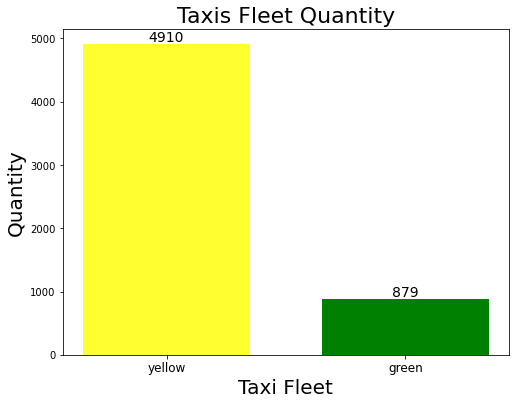

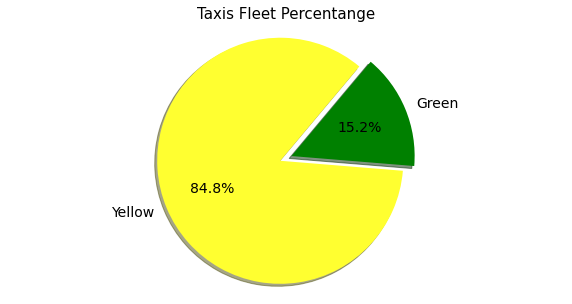

In [30]:
taxis_fleet = train_data['color'].value_counts()
m_height = taxis_fleet.values.tolist() #provides numerical values
taxis_fleet.axes # provides row labels
taxi_fleet_labels = taxis_fleet.axes[0].tolist() #converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(2)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#FFFF30','g']
fig, ax = plt.subplots(figsize=(8,6))
taxi_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Taxi Fleet",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Taxis Fleet Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('yellow','green'), fontsize = 12)

#Auto-labels the number of taxi fleet for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(taxi_bars)        
plt.show() #Display bars. 
#--------------------------

#Get the distribution types and its values for Single Pie chart
taxi_fleet = train_data['color'].value_counts()
pop_size = taxi_fleet.values.tolist() #Provides numerical values
pop_types = taxi_fleet.axes[0].tolist() #Converts index labels object to list

# Data to plot
pop_labels = 'Yellow','Green'
colors = ['#FFFF30','g']
explode = (0, 0.1)  # explode 1st slice
fig = plt.figure(figsize=(10,5))

# Plot
plt.title('Taxis Fleet Percentange', fontsize=15)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=50)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

In [31]:
taxis.passengers.value_counts()

1    4678
2     876
5     277
3     243
6     153
4     110
0      96
Name: passengers, dtype: int64

[4210, 792, 246, 217, 137, 99, 88]


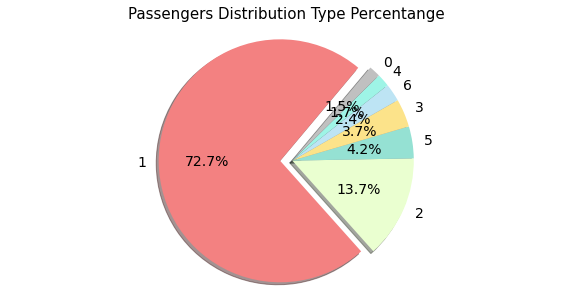

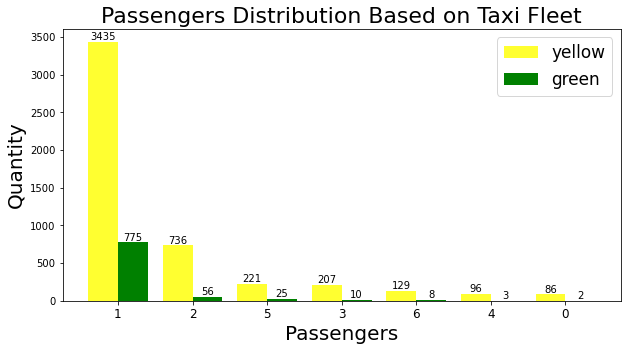

In [32]:
taxis_fleet = train_data['passengers'].value_counts()
m_height = taxis_fleet.values.tolist() #provides numerical values
taxis_fleet.axes # provides row labels
taxi_fleet_labels = taxis_fleet.axes[0].tolist() #converts index object to list

#Get the distribution types and its values for Single Pie chart
passenger = train_data['passengers'].value_counts()
pop_size = passenger.values.tolist() #Provides numerical values
pop_types = passenger.axes[0].tolist() #Converts index labels object to list
print(pop_size)

# Data to plot
pop_labels = '1', '2', '5', '3', '6', '4', '0'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6','#C0C0C0']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(10,5))
# Plot
plt.title('Passengers Distribution Type Percentange', fontsize=15)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=50)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

#===

#=====PLOT Preparations and Plotting====#
ind = np.arange(7)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6','#C0C0C0']
taxi_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Passengers",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Passengers Distribution Based on Taxi Fleet',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('1', '2', '5', '3', '6', '4', '0'), fontsize = 12)

#Auto-labels the number of taxi fleet for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

yellow = [] #cash taxi fleet list
green = [] #credit card taxi fleet list
for taxiFleet in taxi_fleet_labels:
    size = len(train_data[train_data['passengers'] == taxiFleet].index)
    yellows = len(train_data[(train_data['passengers'] == taxiFleet) & (train_data['color'] == 'yellow')].index)
    yellow.append(yellows)
    green.append(size-yellows)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(10,5))
yellow_bars = ax.bar(ind, yellow, width, color='#FFFF30')
green_bars = ax.bar(ind+width, green , width, color='g')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Passengers",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Passengers Distribution Based on Taxi Fleet',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('1', '2', '5', '3', '6', '4', '0'), fontsize = 12)
ax.legend((yellow_bars,green_bars),('yellow','green'),fontsize=17)
autolabel(yellow_bars, 10)
autolabel(green_bars, 10)

* Payment

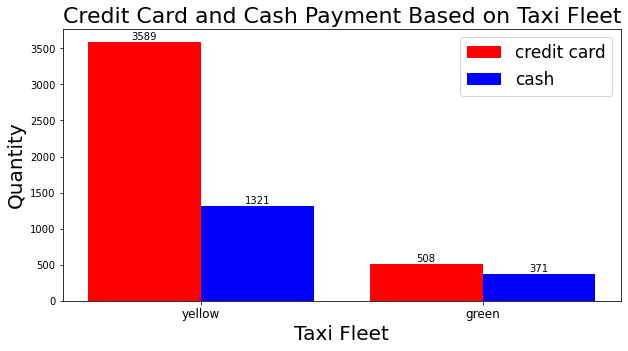

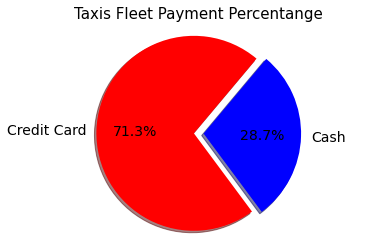

In [33]:
taxis_fleet = train_data['color'].value_counts()
m_height = taxis_fleet.values.tolist() #provides numerical values
taxis_fleet.axes # provides row labels
taxi_fleet_labels = taxis_fleet.axes[0].tolist() #converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(2)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#FFFF30','g']
taxi_bars = ax.bar(ind, m_height , width, color=colors)

#Auto-labels the number of taxi fleet for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

cash = [] #cash taxi fleet list
credit_card = [] #credit card taxi fleet list
for taxiFleet in taxi_fleet_labels:
    size = len(train_data[train_data['color'] == taxiFleet].index)
    credit = len(train_data[(train_data['color'] == taxiFleet) & (train_data['payment'] == 'credit card')].index)
    credit_card.append(credit)
    cash.append(size-credit)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(10,5))
credit_card_bars = ax.bar(ind, credit_card, width, color='#FF0000')
cash_bars = ax.bar(ind+width, cash , width, color='#0000FF')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Taxi Fleet",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Credit Card and Cash Payment Based on Taxi Fleet',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('yellow','green'), fontsize = 12)
ax.legend((credit_card_bars,cash_bars),('credit card','cash'),fontsize=17)
autolabel(credit_card_bars, 10)
autolabel(cash_bars, 10)
plt.show()

#==========

#Get the distribution types and its values for Single Pie chart
taxi_fleet = train_data['payment'].value_counts()
pop_size = taxi_fleet.values.tolist() #Provides numerical values
pop_types = taxi_fleet.axes[0].tolist() #Converts index labels object to list

# Data to plot
pop_labels = 'Credit Card','Cash'
colors = ['#FF0000','#0000FF']
explode = (0, 0.1)  # explode 1st slice
fig = plt.figure(figsize=(6,4))

# Plot
plt.title('Taxis Fleet Payment Percentange', fontsize=15)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=50)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

* Pickup Zone

In [34]:
taxis.pickup_zone.value_counts()

Midtown Center                         230
Upper East Side South                  211
Penn Station/Madison Sq West           210
Clinton East                           208
Midtown East                           198
                                      ... 
Homecrest                                1
Bedford Park                             1
Riverdale/North Riverdale/Fieldston      1
Hollis                                   1
Hillcrest/Pomonok                        1
Name: pickup_zone, Length: 194, dtype: int64

In [35]:
taxis.groupby('color').pickup_zone.value_counts()

color   pickup_zone             
green   Central Harlem              57
        East Harlem South           53
        Astoria                     52
        East Harlem North           49
        Central Harlem North        36
                                    ..
yellow  South Williamsburg           1
        Stuyvesant Heights           1
        Williamsbridge/Olinville     1
        Windsor Terrace              1
        Woodside                     1
Name: pickup_zone, Length: 259, dtype: int64

<AxesSubplot:xlabel='pickup_zone', ylabel='count'>

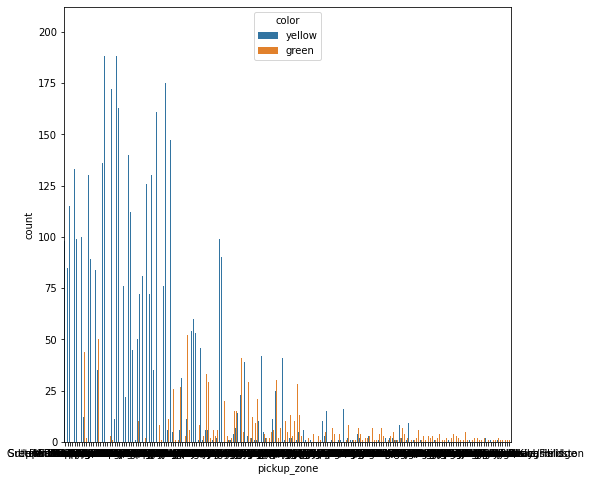

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(data=train_data, x='pickup_zone', hue='color')

* Dropoff Zone

In [37]:
taxis.dropoff_zone.value_counts()

Upper East Side North        245
Murray Hill                  220
Midtown Center               215
Upper East Side South        177
Midtown East                 176
                            ... 
Bensonhurst East               1
Springfield Gardens South      1
East Flushing                  1
Brighton Beach                 1
Ozone Park                     1
Name: dropoff_zone, Length: 203, dtype: int64

In [38]:
taxis.groupby('color').dropoff_zone.value_counts()

color   dropoff_zone                 
green   Central Harlem North             41
        Central Harlem                   32
        Astoria                          31
        East Harlem North                30
        East Harlem South                27
                                         ..
yellow  West Concourse                    1
        Westchester Village/Unionport     1
        Windsor Terrace                   1
        Woodhaven                         1
        Woodlawn/Wakefield                1
Name: dropoff_zone, Length: 355, dtype: int64

<AxesSubplot:xlabel='dropoff_zone', ylabel='count'>

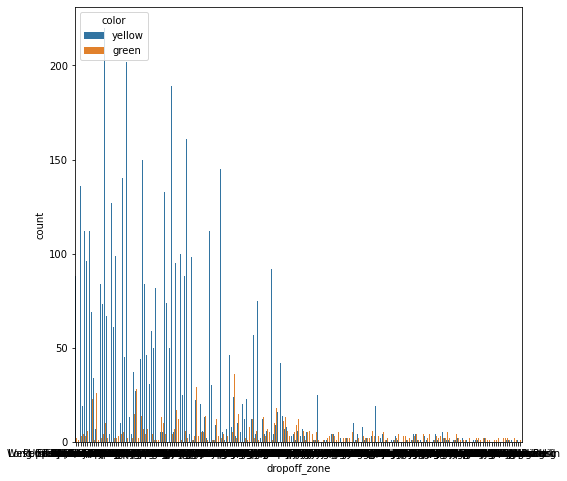

In [39]:
plt.figure(figsize=(8,8))
sns.countplot(data=train_data, x='dropoff_zone', hue='color')

* Pickup Borough

In [40]:
taxis.pickup_borough.value_counts()

Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64

In [41]:
taxis.groupby('color').pickup_borough.value_counts()

color   pickup_borough
green   Brooklyn           313
        Manhattan          294
        Queens             288
        Bronx               83
yellow  Manhattan         4974
        Queens             369
        Brooklyn            70
        Bronx               16
Name: pickup_borough, dtype: int64

<AxesSubplot:xlabel='pickup_borough', ylabel='count'>

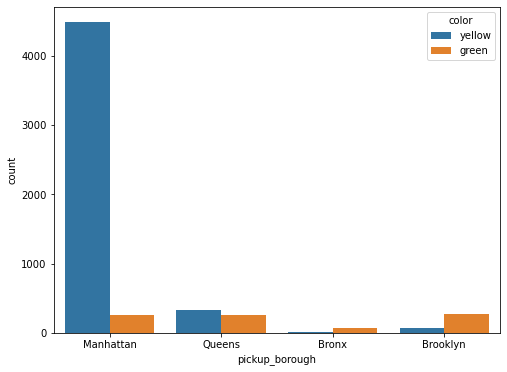

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='pickup_borough', hue='color')

* Dropoff Borough

In [43]:
taxis.dropoff_borough.value_counts()

Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: dropoff_borough, dtype: int64

In [44]:
taxis.groupby('color').dropoff_borough.value_counts()

color   dropoff_borough
green   Manhattan           343
        Queens              276
        Brooklyn            259
        Bronx                95
yellow  Manhattan          4863
        Queens              266
        Brooklyn            242
        Bronx                42
        Staten Island         2
Name: dropoff_borough, dtype: int64

<AxesSubplot:xlabel='dropoff_borough', ylabel='count'>

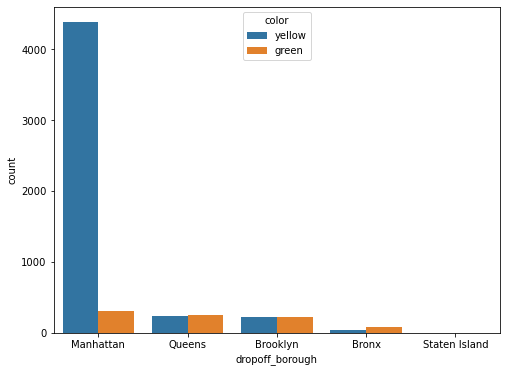

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='dropoff_borough', hue='color')

### Checking Correlation Between Features

In [145]:
correlation_1 = train_data.corr()
correlation_1['fare']

passengers        0.004020
distance          0.918171
fare              1.000000
tip               0.496169
tolls             0.606337
total             0.974555
pickup_year            NaN
pickup_month      0.009143
pickup_date      -0.007667
pickup_hour      -0.008054
pickup_dow       -0.032574
dropoff_year           NaN
dropoff_month     0.025604
dropoff_date     -0.008569
dropoff_hour      0.006591
dropoff_dow      -0.034895
traveling_time    0.422527
Name: fare, dtype: float64

<AxesSubplot:>

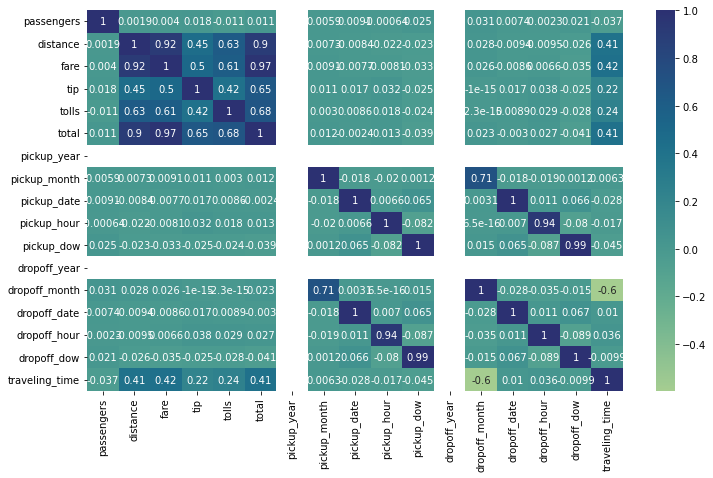

In [146]:
#Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation_1,annot=True, cmap='crest')

### Exploring Relationship Between Individual Features

* Spread fare

In [48]:
#fare

train_data.groupby('color').fare.aggregate(['min', 'max', 'mean', 'sum'])

,min,max,mean,sum
color,,,,
green,2.5,150.0,14.056246,12355.44
yellow,1.0,150.0,12.904202,63359.63


<AxesSubplot:xlabel='fare', ylabel='Density'>

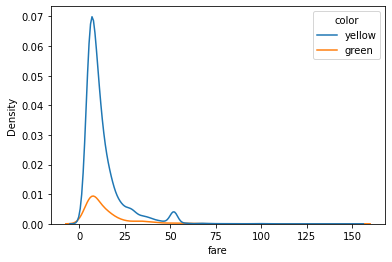

In [49]:
sns.kdeplot(data=train_data, x='fare', hue='color')

In [50]:
#fare with distance

train_data.groupby(['distance', 'color']).fare.aggregate(['min', 'max', 'mean', 'count']).sort_values('count', ascending=False)

,,min,max,mean,count
distance,color,,,,
0.80,yellow,4.5,12.5,5.966981,106
1.00,yellow,5.0,11.5,6.820000,100
0.90,yellow,2.5,11.0,6.426316,95
0.70,yellow,4.0,11.5,5.581522,92
0.60,yellow,4.0,10.5,5.412088,91
...,...,...,...,...,...
6.44,yellow,23.5,23.5,23.500000,1
6.46,green,24.5,24.5,24.500000,1
6.48,green,22.0,22.0,22.000000,1


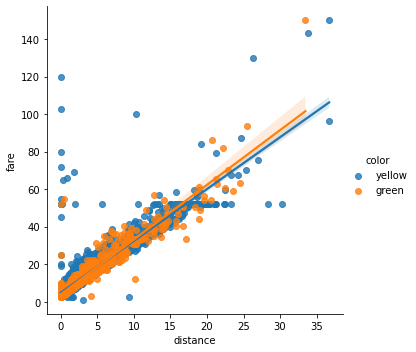

In [51]:
sns.lmplot(data=train_data, x='distance', y='fare', hue='color')

In [52]:
#fare with traveling_time

train_data.groupby(['traveling_time', 'color']).fare.aggregate(['min', 'max', 'mean', 'count']).sort_values('min', ascending=False)

min    max     mean  count
traveling_time color                               
1.498056       green   150.0  150.0  150.000      1
1.080833       yellow  150.0  150.0  150.000      1
0.932500       yellow  143.5  143.5  143.500      1
0.773333       yellow  130.0  130.0  130.000      1
1.035000       yellow   96.5   96.5   96.500      1
...                      ...    ...      ...    ...
0.003889       yellow    2.5    2.5    2.500      1
               yellow    2.5    2.5    2.500      1
               yellow    2.5    2.5    2.500      1
0.008333       green     2.5    2.5    2.500      1
0.057222       yellow    1.0    5.0    3.875      4

[3827 rows x 4 columns]

<AxesSubplot:xlabel='traveling_time', ylabel='fare'>

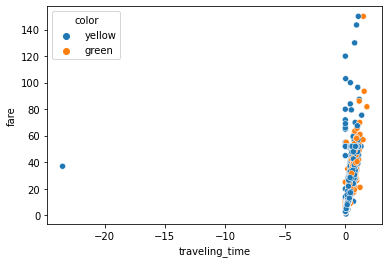

In [53]:
sns.scatterplot(data=train_data, x='traveling_time', y='fare', hue='color')

In [54]:
#fare with tip

train_data.groupby(['fare', 'color']).tip.aggregate(['min', 'max', 'mean', 'count']).sort_values('max', ascending=False)

,,min,max,mean,count
fare,color,,,,
120.00,yellow,33.20,33.20,33.20,1
75.50,yellow,23.19,23.19,23.19,1
69.06,yellow,20.80,20.80,20.80,1
103.00,yellow,20.65,20.65,20.65,1
100.00,yellow,20.56,20.56,20.56,1
...,...,...,...,...,...
33.01,green,0.00,0.00,0.00,1
33.22,green,0.00,0.00,0.00,1
33.27,green,0.00,0.00,0.00,1


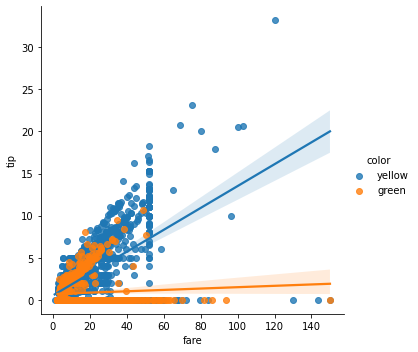

In [55]:
sns.lmplot(data=train_data, x='fare', y='tip', hue='color')

In [56]:
#fare with tolls

train_data.groupby(['fare', 'color']).tolls.aggregate(['min', 'max', 'mean', 'count']).sort_values('max', ascending=False)

min    max    mean  count
fare   color                              
150.00 yellow  24.02  24.02  24.020      1
       green   18.90  18.90  18.900      1
44.00  yellow   0.00  17.28   4.608      5
51.50  yellow  16.26  16.26  16.260      1
120.00 yellow  12.50  12.50  12.500      1
...              ...    ...     ...    ...
21.08  green    0.00   0.00   0.000      1
21.21  green    0.00   0.00   0.000      1
21.40  green    0.00   0.00   0.000      1
21.50  green    0.00   0.00   0.000      1
29.50  green    0.00   0.00   0.000      1

[292 rows x 4 columns]

<Figure size 864x504 with 0 Axes>

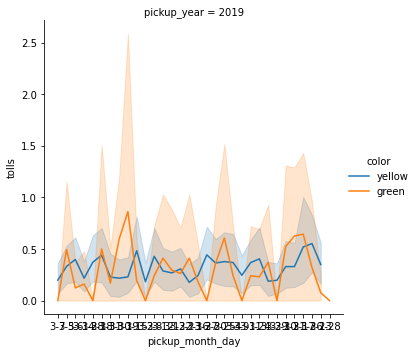

In [57]:
plt.figure(figsize=(12,7))

sns.relplot(x='pickup_month_day', y='tolls', 
            row='pickup_year', kind='line', hue='color', data=train_data)

In [58]:
#fare with total

train_data.groupby(['fare', 'color']).total.aggregate(['min', 'mean', 'max', 'count']).sort_values('max', ascending=False)

min        mean     max  count
fare  color                                    
150.0 yellow  174.82  174.820000  174.82      1
      green   169.70  169.700000  169.70      1
120.0 yellow  166.00  166.000000  166.00      1
143.5 yellow  144.30  144.300000  144.30      1
130.0 yellow  136.56  136.560000  136.56      1
...              ...         ...     ...    ...
4.0   green     4.80    5.539583    6.96     24
2.5   yellow    3.30    4.414091    6.30     22
3.0   green     3.80    4.200000    4.80     10
2.5   green     3.30    3.466667    4.30     12
1.0   yellow    1.30    1.300000    1.30      1

[292 rows x 4 columns]

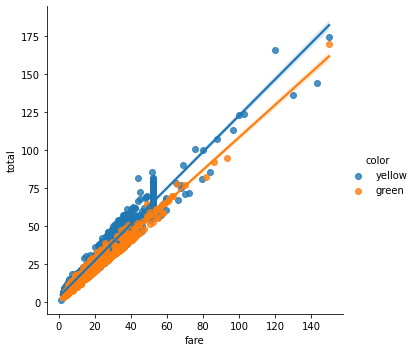

In [59]:
sns.lmplot(data=train_data, x='fare', y='total', hue='color')

* Spread tip

In [60]:
#tip

train_data.groupby('color').tip.aggregate(['min', 'max', 'mean', 'sum'])

,min,max,mean,sum
color,,,,
green,0.0,10.71,0.805028,707.62
yellow,0.0,33.20,2.191371,10759.63


<AxesSubplot:xlabel='tip', ylabel='Density'>

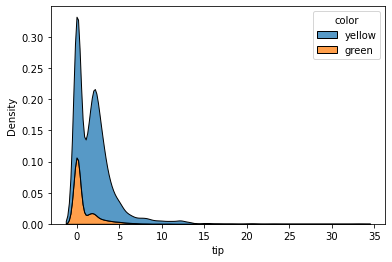

In [61]:
sns.kdeplot(data=train_data, x='tip', hue='color', multiple='stack')

In [62]:
#tip with distance

train_data.groupby(['distance', 'color']).tip.aggregate(['mean', 'count']).sort_values('mean', ascending=False)

,,mean,count
distance,color,,
26.92,yellow,23.19,1
10.36,yellow,20.56,1
24.63,yellow,17.86,1
12.60,yellow,17.10,1
16.77,yellow,16.39,1
...,...,...,...
10.05,green,0.00,1
4.04,green,0.00,1
4.07,green,0.00,1


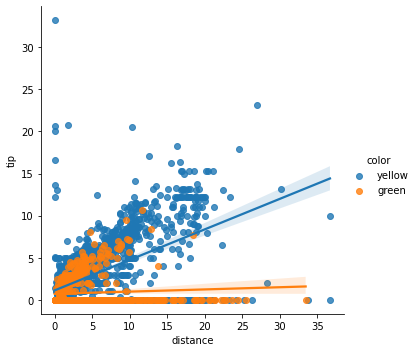

In [63]:
sns.lmplot(data=train_data, x='distance', y='tip', hue='color')

In [64]:
#tip with traveling_time

train_data.groupby(['traveling_time', 'color']).tip.aggregate(['min', 'max', 'mean', 'count']).sort_values('min', ascending=False)

min    max   mean  count
traveling_time color                             
1.358889       yellow  23.19  23.19  23.19      1
0.000833       yellow  20.08  20.08  20.08      1
1.256111       yellow  18.30  18.30  18.30      1
1.162500       yellow  17.86  17.86  17.86      1
0.287778       yellow  17.10  17.10  17.10      1
...                      ...    ...    ...    ...
0.174444       green    0.00   1.00   0.50      2
               yellow   0.00   0.00   0.00      2
               green    0.00   0.00   0.00      1
0.174722       green    0.00   0.00   0.00      1
1.794444       green    0.00   0.00   0.00      1

[3827 rows x 4 columns]

<AxesSubplot:xlabel='traveling_time', ylabel='tip'>

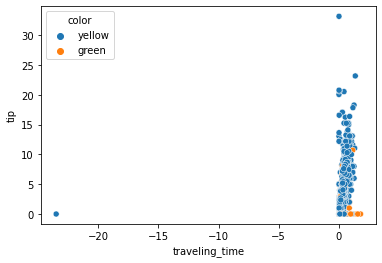

In [65]:
sns.scatterplot(data=train_data, x='traveling_time', y='tip', hue='color')

In [66]:
#tip with tolls

train_data.groupby(['tolls', 'color']).tip.aggregate(['min', 'max', 'mean', 'count']).sort_values('max', ascending=False)

,,min,max,mean,count
tolls,color,,,,
12.50,yellow,33.20,33.20,33.200000,1
0.00,yellow,0.00,23.19,1.900202,4645
5.76,yellow,0.00,18.30,7.205640,250
16.26,yellow,17.10,17.10,17.100000,1
17.28,yellow,16.27,16.27,16.270000,1
8.50,yellow,13.66,13.66,13.660000,1
5.54,yellow,5.17,12.17,8.670000,2
11.52,yellow,12.06,12.06,12.060000,1
0.00,green,0.00,10.71,0.802840,838


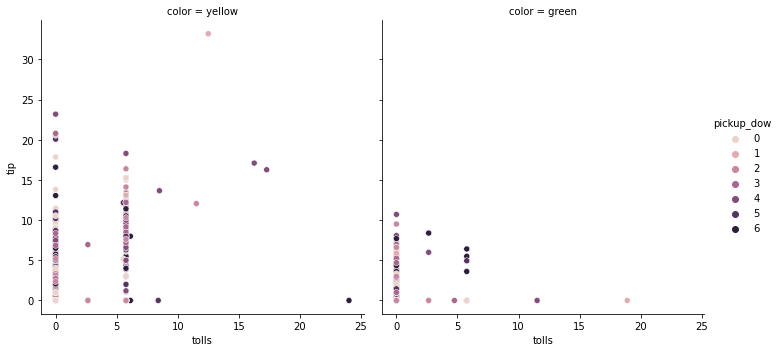

In [67]:
sns.relplot(data=train_data, x='tolls', y='tip', col='color', hue='pickup_dow')

In [68]:
#tip with pickup_hour

train_data.groupby('pickup_hour').tip.aggregate(['min', 'max', 'mean', 'count']).sort_values('mean', ascending=False)

,min,max,mean,count
pickup_hour,,,,
5,0.0,12.21,2.784894,47
4,0.0,17.10,2.448364,55
22,0.0,12.50,2.240455,286
23,0.0,20.65,2.219812,266
15,0.0,20.80,2.186678,298
1,0.0,11.06,2.183700,100
0,0.0,16.27,2.183646,192
19,0.0,33.20,2.137769,363
21,0.0,15.26,2.109034,321


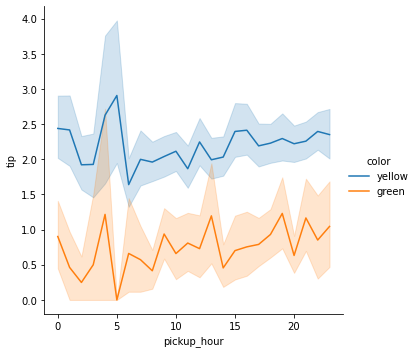

In [69]:
sns.relplot(data=train_data, x='pickup_hour', y='tip', kind='line', hue='color')

In [70]:
#tip with pickup_borough

train_data.groupby(['pickup_borough', 'color']).tip.aggregate(['min','max','mean', 'count']).sort_values('mean', ascending=False)

min    max      mean  count
pickup_borough color                              
Queens         yellow  0.0  23.19  4.977784    334
Manhattan      yellow  0.0  20.56  1.983873   4480
Brooklyn       yellow  0.0   6.35  1.266719     64
Manhattan      green   0.0  10.71  1.086667    264
Brooklyn       green   0.0   7.70  0.888566    279
Queens         green   0.0   9.51  0.610502    259
Bronx          green   0.0   8.39  0.201507     73
               yellow  0.0   0.00  0.000000     13

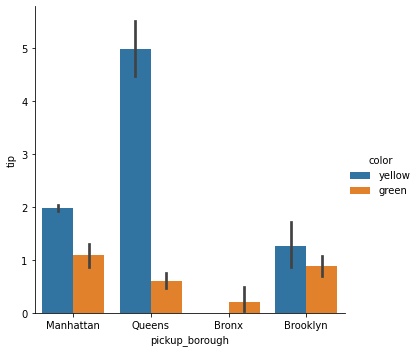

In [71]:
sns.catplot(data=train_data, x='pickup_borough', y='tip', hue='color', kind='bar')

* Spread passengers

In [72]:
#passengers in pickup_month_day

train_data.groupby(['pickup_month_day', 'color']).passengers.agg(['min', 'max','mean', 'count']).sort_values('mean', ascending=False)

,,min,max,mean,count
pickup_month_day,color,,,,
3-30,yellow,0,6,1.823899,159
3-24,yellow,0,6,1.780702,114
3-26,green,1,6,1.777778,18
3-5,yellow,0,6,1.712644,174
3-16,yellow,0,6,1.692771,166
...,...,...,...,...,...
3-11,green,1,2,1.041667,24
3-12,green,1,2,1.035714,28
3-27,green,1,2,1.029412,34


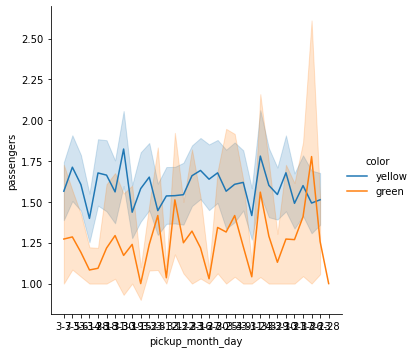

In [73]:
sns.relplot(data=train_data, x='pickup_month_day', y='passengers', kind='line', hue='color')

* pickup

In [74]:
#total pickup in pickup_dow

train_data.pickup_dow.value_counts()

4    1016
5     944
2     868
3     820
6     776
1     741
0     624
Name: pickup_dow, dtype: int64

In [75]:
train_data.groupby('color').pickup_dow.value_counts()

color   pickup_dow
green   2             148
        4             148
        5             136
        6             134
        3             117
        1             106
        0              90
yellow  4             868
        5             808
        2             720
        3             703
        6             642
        1             635
        0             534
Name: pickup_dow, dtype: int64

<AxesSubplot:xlabel='pickup_dow', ylabel='count'>

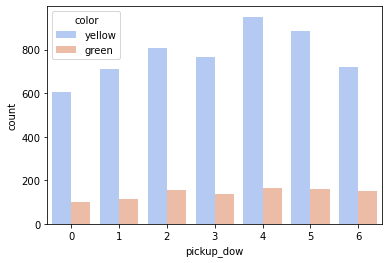

In [76]:
sns.countplot(data=taxis, x='pickup_dow', palette='coolwarm', hue='color')

* Income

In [77]:
#total per month

train_data.groupby(['pickup_month_day', 'color']).total.aggregate(['min', 'max', 'mean', 'count']).sort_values('mean', ascending=False)

,,min,max,mean,count
pickup_month_day,color,,,,
3-5,green,3.30,92.40,22.751714,35
3-7,green,3.30,94.80,21.822273,22
3-15,yellow,6.36,85.66,20.452745,153
3-27,yellow,3.30,81.95,20.165917,169
3-13,yellow,3.80,144.30,20.155503,189
...,...,...,...,...,...
3-28,green,4.81,33.72,14.238750,32
3-31,green,3.80,58.80,13.953529,34
3-27,green,4.30,34.15,13.232353,34


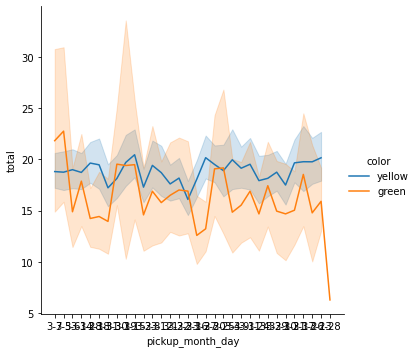

In [78]:
sns.relplot(data=train_data, x='pickup_month_day', y='total',kind='line', hue='color')

There are times you want to quickly see different plots to draw insights from the data. In that case, you can use grid plots. Seaborn, a visualization library provides a handy function for that.

sns.pairplot(train_data)
sns.pairplot(train_data)

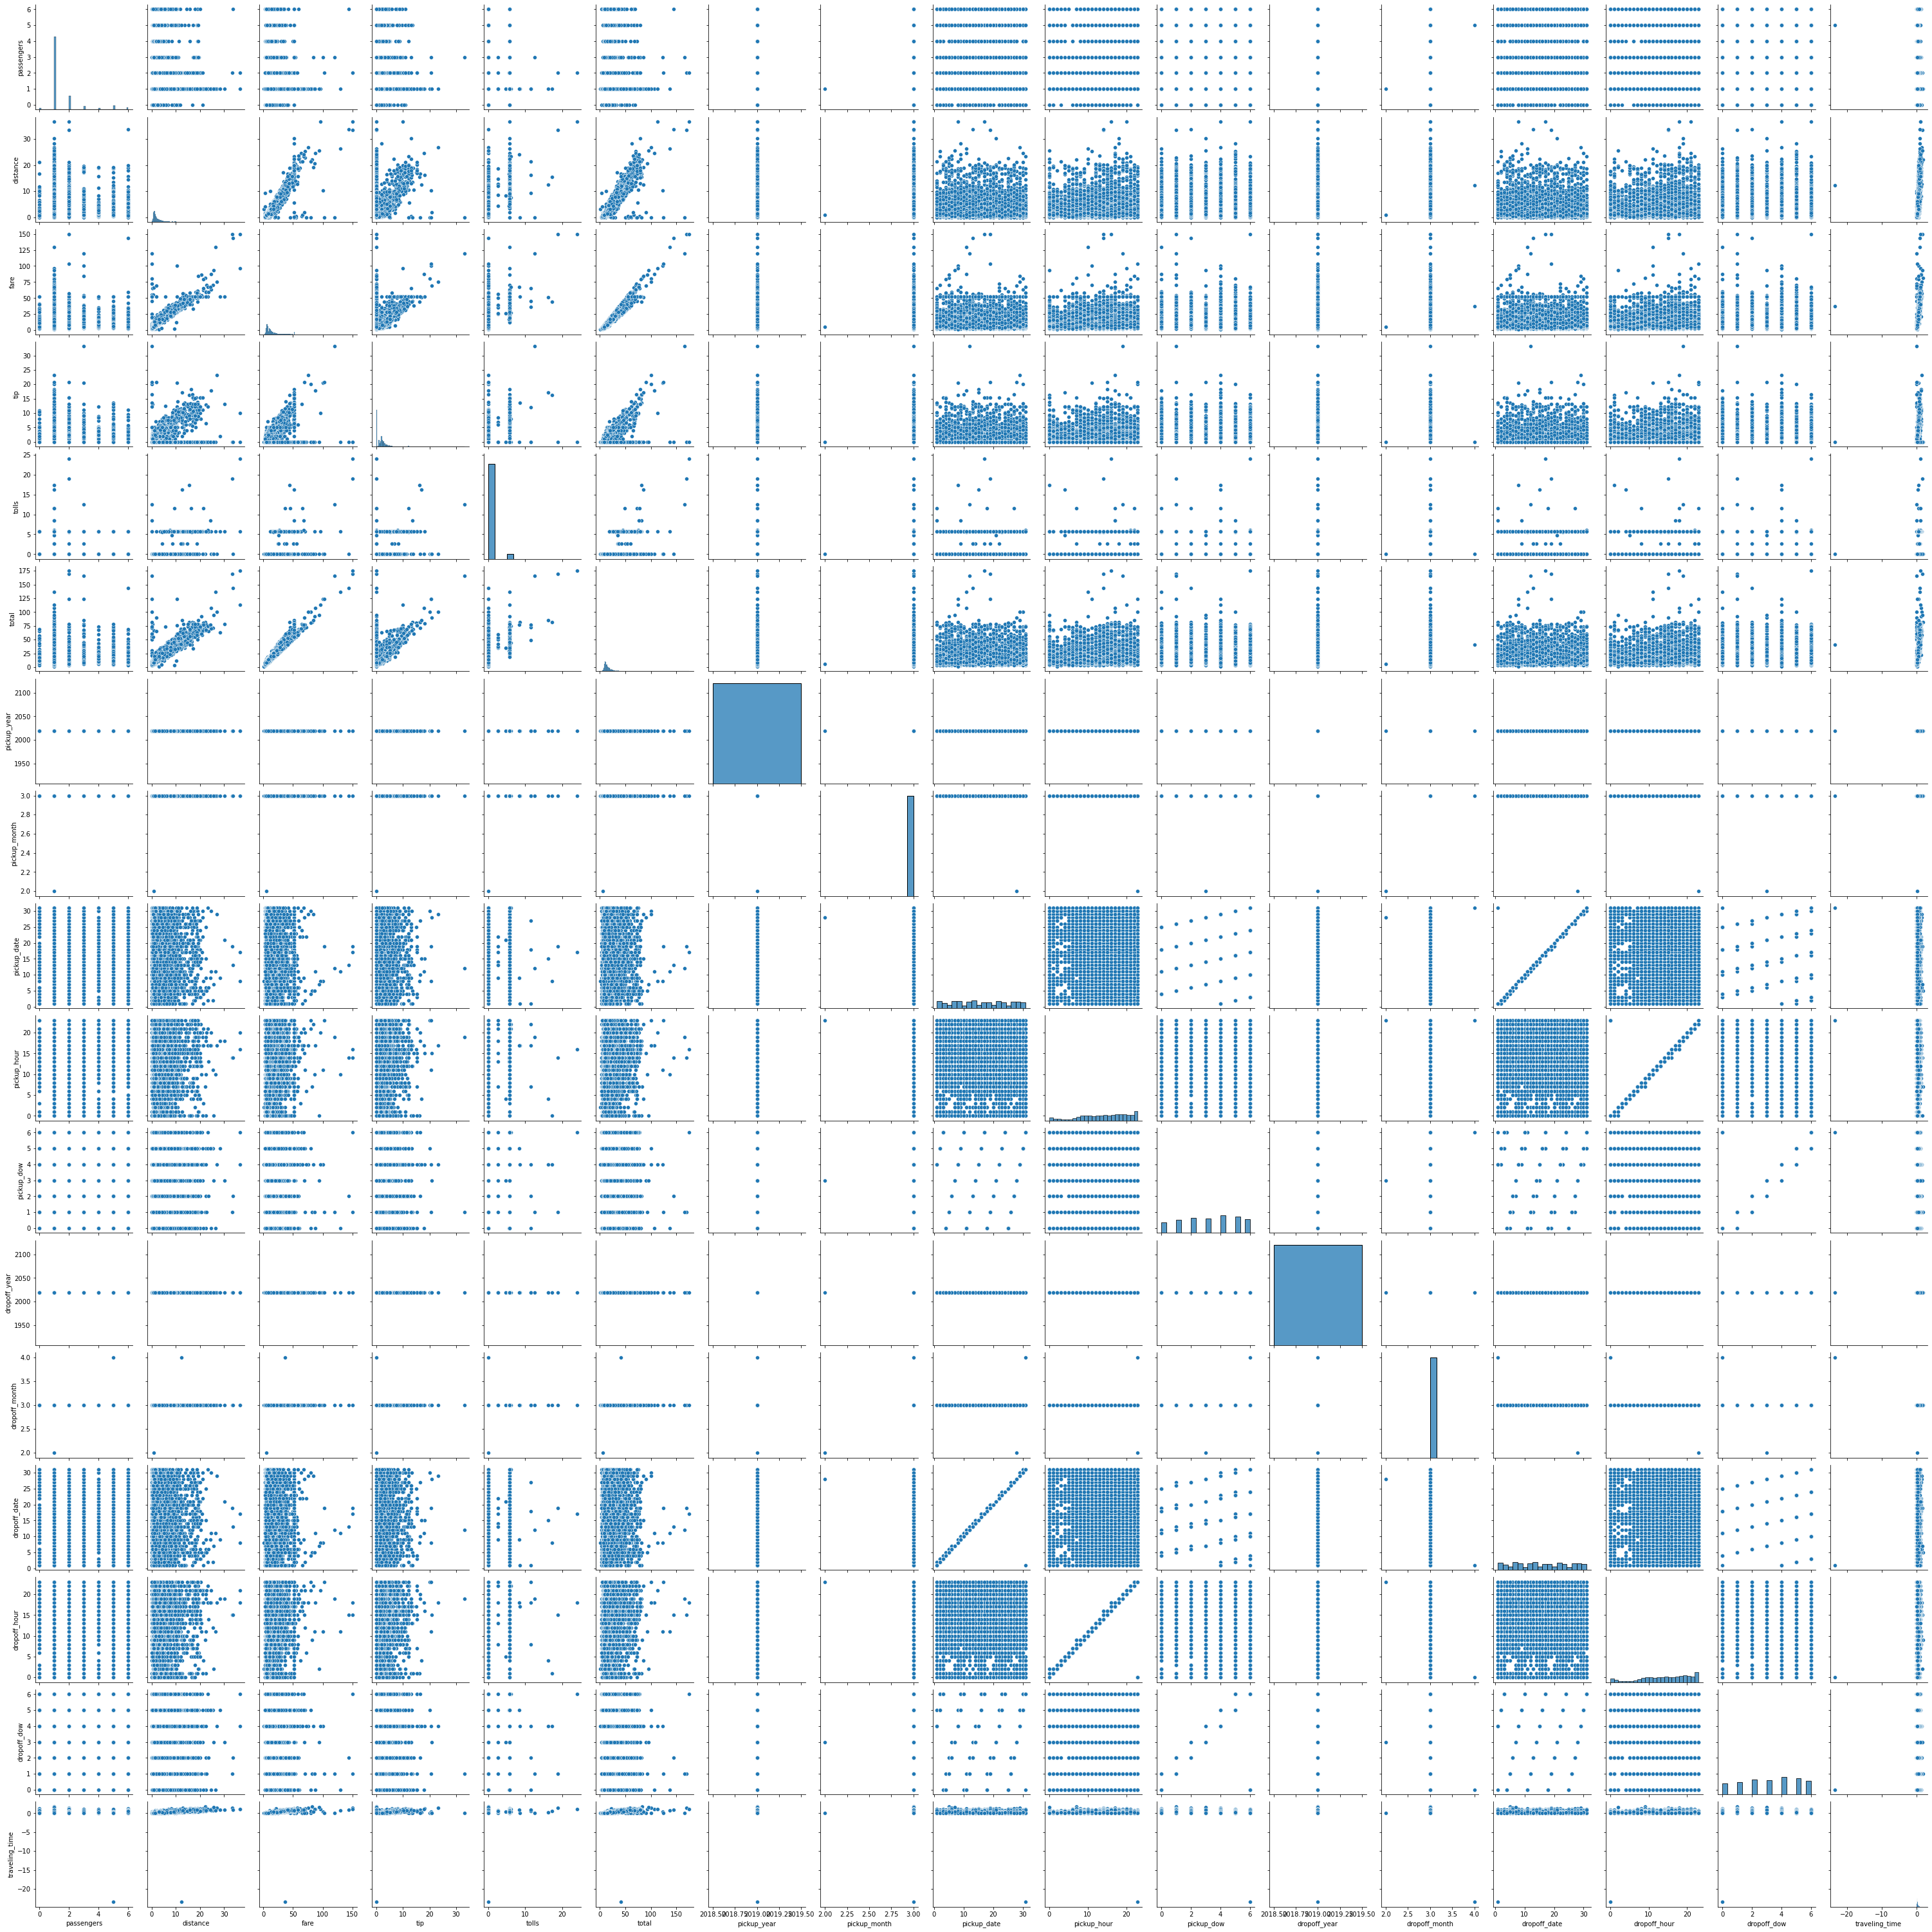

In [79]:
sns.pairplot(train_data)

As you can see, it plots the relationship between all numerical features and histograms of each feature as well. But it's slow...

To summarize the data exploration, the goal here it to understand the data as much as you can. There is no limit to what you can inspect. And understanding the data will help you build an effective ML systems. 

<a name='4'></a>

## 4. Data Preprocessing 

Here are three most things that we will take care of in our dataset:

* Missing values
* Scaling numerical features
* Pipline categorical and Numeric features 

Since we are going to prepare the data for the ML model, let's create an the training label and input training data

In [80]:
training_labels_1 = train_data['fare']

training_labels_1.head()

1570     8.0
1571     5.0
4518     9.5
1541    12.5
5384     5.0
Name: fare, dtype: float64

### Handling Missing Values

In [82]:
training_input_data = train_data

In [83]:
training_input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5789 entries, 1570 to 2522
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pickup            5789 non-null   datetime64[ns]
 1   dropoff           5789 non-null   datetime64[ns]
 2   passengers        5789 non-null   int64         
 3   distance          5789 non-null   float64       
 4   fare              5789 non-null   float64       
 5   tip               5789 non-null   float64       
 6   tolls             5789 non-null   float64       
 7   total             5789 non-null   float64       
 8   color             5789 non-null   object        
 9   payment           5748 non-null   object        
 10  pickup_zone       5766 non-null   object        
 11  dropoff_zone      5749 non-null   object        
 12  pickup_borough    5766 non-null   object        
 13  dropoff_borough   5749 non-null   object        
 14  pickup_year       578

In [84]:
training_input_data.isna().sum()

pickup               0
dropoff              0
passengers           0
distance             0
fare                 0
tip                  0
tolls                0
total                0
color                0
payment             41
pickup_zone         23
dropoff_zone        40
pickup_borough      23
dropoff_borough     40
pickup_year          0
pickup_month         0
pickup_date          0
pickup_hour          0
pickup_dow           0
dropoff_year         0
dropoff_month        0
dropoff_date         0
dropoff_hour         0
dropoff_dow          0
pickup_month_day     0
traveling_time       0
dtype: int64

In [85]:
print('The Percentage of missing values in payment is: {}%'.format(training_input_data.isnull().sum()['payment'] / len(training_input_data) * 100))
print('The Percentage of missing values in pickup_zone is: {}%'.format(training_input_data.isnull().sum()['pickup_zone'] / len(training_input_data) * 100))
print('The Percentage of missing values in dropoff_zone is: {}%'.format(training_input_data.isnull().sum()['dropoff_zone'] / len(training_input_data) * 100))
print('The Percentage of missing values in pickup_borough is: {}%'.format(training_input_data.isnull().sum()['pickup_borough'] / len(training_input_data) * 100))
print('The Percentage of missing values in dropoff_borough is: {}%'.format(training_input_data.isnull().sum()['dropoff_borough'] / len(training_input_data) * 100))

The Percentage of missing values in payment is: 0.7082397650716877%
The Percentage of missing values in pickup_zone is: 0.3973052340646053%
The Percentage of missing values in dropoff_zone is: 0.6909656244601831%
The Percentage of missing values in pickup_borough is: 0.3973052340646053%
The Percentage of missing values in dropoff_borough is: 0.6909656244601831%


In [86]:
#change missiing value with mode

training_input_data.payment.unique()

array(['credit card', 'cash', nan], dtype=object)

In [87]:
training_input_data['payment'] = training_input_data['payment'].replace(np.nan, 'credit card')

In [88]:
#change missiing value in pickup_zone with mode

training_input_data.pickup_zone.mode()

0    Midtown Center
Name: pickup_zone, dtype: object

In [89]:
training_input_data['pickup_zone'] = training_input_data['pickup_zone'].replace(np.nan, 'Midtown Center')

In [90]:
#change missiing value in dropoff_zone with mode

training_input_data.dropoff_zone.mode()

0    Upper East Side North
Name: dropoff_zone, dtype: object

In [91]:
training_input_data['dropoff_zone'] = training_input_data['dropoff_zone'].replace(np.nan, 'Upper East Side North')

In [92]:
#change missiing value in pickup_borough with mode

training_input_data.pickup_borough.mode()

0    Manhattan
Name: pickup_borough, dtype: object

In [93]:
training_input_data['pickup_borough'] = training_input_data['pickup_borough'].replace(np.nan, 'Manhattan')

In [94]:
#change missiing value in dropoff_borough with mode

training_input_data.dropoff_borough.mode()

0    Manhattan
Name: dropoff_borough, dtype: object

In [95]:
training_input_data['dropoff_borough'] = training_input_data['dropoff_borough'].replace(np.nan, 'Manhattan')

In [96]:
training_input_data.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment             0
pickup_zone         0
dropoff_zone        0
pickup_borough      0
dropoff_borough     0
pickup_year         0
pickup_month        0
pickup_date         0
pickup_hour         0
pickup_dow          0
dropoff_year        0
dropoff_month       0
dropoff_date        0
dropoff_hour        0
dropoff_dow         0
pickup_month_day    0
traveling_time      0
dtype: int64

* rules:
    * use data that we consider important
    * high numerical correlation to be entered into feats

In [97]:
#1: fare
correlation_1 = training_input_data.corr()
correlation_1['fare']

passengers        0.004020
distance          0.918171
fare              1.000000
tip               0.496169
tolls             0.606337
total             0.974555
pickup_year            NaN
pickup_month      0.009143
pickup_date      -0.007667
pickup_hour      -0.008054
pickup_dow       -0.032574
dropoff_year           NaN
dropoff_month     0.025604
dropoff_date     -0.008569
dropoff_hour      0.006591
dropoff_dow      -0.034895
traveling_time    0.422527
Name: fare, dtype: float64

<AxesSubplot:>

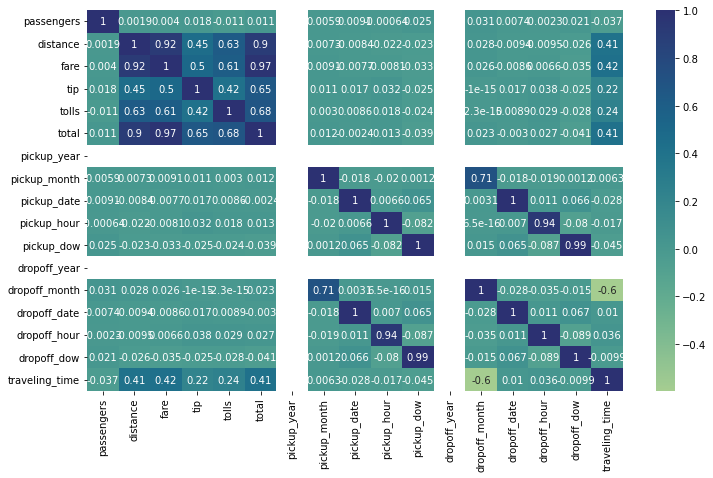

In [98]:
#Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation_1,annot=True, cmap='crest')

In [99]:
cat_feats_1 = training_input_data[['passengers','color','pickup_borough','dropoff_borough',
                                 'pickup_month', 'dropoff_month']]

In [100]:
cat_feats_1.head()

,passengers,color,pickup_borough,dropoff_borough,pickup_month,dropoff_month
1570,1,yellow,Manhattan,Manhattan,3,3
1571,5,yellow,Manhattan,Manhattan,3,3
4518,2,yellow,Manhattan,Manhattan,3,3
1541,2,yellow,Manhattan,Queens,3,3
5384,1,yellow,Manhattan,Manhattan,3,3


In [101]:
num_feats1 = training_input_data[['distance','tip','tolls','total','traveling_time']]

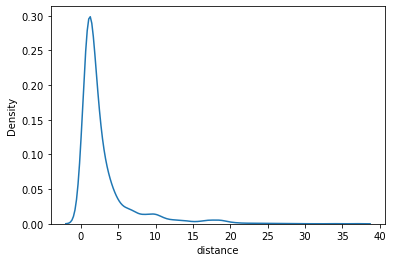

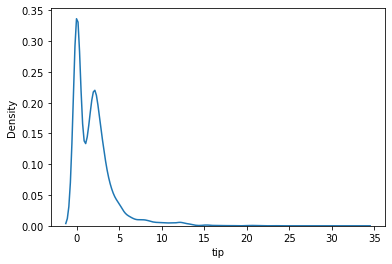

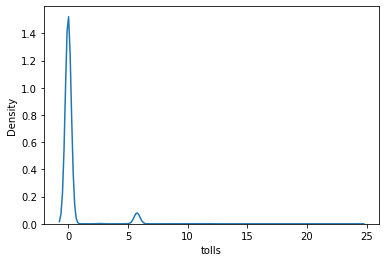

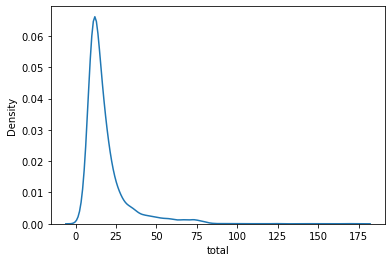

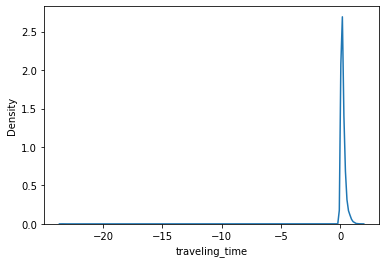

In [102]:
for i in num_feats1.columns:
    sns.kdeplot(num_feats1[i])
    plt.show()

In [103]:
num_feats1.describe()

,distance,tip,tolls,total,traveling_time
count,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000
mean,3.020888,1.980869,0.314873,18.503916,0.234375
std,3.820907,2.470192,1.394180,13.896511,0.367729
min,0.000000,0.000000,0.000000,1.300000,-23.496389
25%,0.970000,0.000000,0.000000,10.800000,0.106944
50%,1.630000,1.660000,0.000000,14.150000,0.179722
75%,3.220000,2.760000,0.000000,20.300000,0.308333
max,36.700000,33.200000,24.020000,174.820000,1.794444


### Scaling Numerical features

In [104]:
from sklearn.impute import SimpleImputer

In [105]:
from sklearn.pipeline import Pipeline

In [106]:
from sklearn.preprocessing import OneHotEncoder

* Fare

In [107]:
from sklearn.preprocessing import StandardScaler

num_feats_pipe_1 = Pipeline([
                  ('imputer', SimpleImputer()), 
                  ('scaler', StandardScaler())         
            ])

num_feats_preprocessed_1 = num_feats_pipe_1.fit_transform(num_feats1)

In [108]:
num_feats_preprocessed_1

array([[-0.4766003 ,  0.10896089, -0.22586763, -0.35651712, -0.21813559],
       [-0.62317504, -0.801978  , -0.22586763, -0.6623757 , -0.45081477],
       [-0.48706992, -0.801978  , -0.22586763, -0.41049216, -0.03531623],
       ...,
       [-0.47921771,  0.29114867, -0.22586763, -0.36011545, -0.24684276],
       [-0.54203545, -0.801978  , -0.22586763, -0.73434243, -0.43646118],
       [-0.41378255,  0.15349568, -0.22586763, -0.31261742, -0.21133652]])

### Pipeline for transforming Categorical Features

* Fare

In [109]:
cat_feats_pipe_1 = Pipeline([
     ('encoder', OneHotEncoder())                      
])

cat_feats_pre_1 = cat_feats_pipe_1.fit_transform(cat_feats_1)

In [110]:
type(cat_feats_pre_1)

scipy.sparse.csr.csr_matrix

### Final Data Processing Pipeline 
Here, we are going to make a single tranformer which will do all numerical and categorical features transformations.

In [111]:
from sklearn.compose import ColumnTransformer

# The transformer requires lists of features

num_list = list(num_feats1)
cat_list = list(cat_feats_1)

final_pipe = ColumnTransformer([
   ('num', num_feats_pipe_1, num_list),    
   ('cat', cat_feats_pipe_1, cat_list)                        

])

training_data_preprocessed_1 = final_pipe.fit_transform(training_input_data)

In [112]:
training_data_preprocessed_1

array([[-0.4766003 ,  0.10896089, -0.22586763, ...,  0.        ,
         1.        ,  0.        ],
       [-0.62317504, -0.801978  , -0.22586763, ...,  0.        ,
         1.        ,  0.        ],
       [-0.48706992, -0.801978  , -0.22586763, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.47921771,  0.29114867, -0.22586763, ...,  0.        ,
         1.        ,  0.        ],
       [-0.54203545, -0.801978  , -0.22586763, ...,  0.        ,
         1.        ,  0.        ],
       [-0.41378255,  0.15349568, -0.22586763, ...,  0.        ,
         1.        ,  0.        ]])

So, now we have a data that is well prepared to be fed to machine learning model.

<a name='5'></a>
## 5. Choosing and Training a model

In [113]:
from sklearn.linear_model import LinearRegression

reg_model_training_1 = LinearRegression()

After we have created the model, we fit on the input training data and output labels.

In [114]:
reg_model_training_1.fit(training_data_preprocessed_1, training_labels_1)

LinearRegression()

In [115]:
# Coef or coefficients are referred to as weights

reg_model_training_1.coef_

array([ 1.13688646e-01, -2.62850290e+00, -1.42954141e+00,  1.38799893e+01,
       -1.71210170e-01,  6.17585028e-02,  5.13453840e-03, -1.85712668e-02,
       -4.38390161e-02,  8.49925844e-03, -3.46238678e-02,  2.16418510e-02,
        6.14817898e-01, -6.14817898e-01,  4.47678883e-01, -3.03244670e-02,
       -5.59330744e-01,  1.41976327e-01,  2.22659091e-01,  7.00369380e-02,
       -5.24419030e-01,  5.84588435e-02,  1.73264157e-01,  1.72373708e+00,
       -1.72373708e+00,  1.72373708e+00,  5.61492770e+00, -7.33866478e+00])

In [116]:
# Intercept is what can be compared to the bias 

reg_model_training_1.intercept_

10.47310951072765

<a name='6'></a>
## 6. Model Evaluation

Let's evaluate how good is the model on the few examples from the training set.

* fare

#### MAPE

In [117]:
from sklearn.metrics import mean_squared_error

predictions = reg_model_training_1.predict(training_data_preprocessed_1)

In [118]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(training_labels_1, predictions)
mape

0.057270144144797745

#### RMSE 

In [119]:
mse = mean_squared_error(training_labels_1, predictions)

rmse = np.sqrt(mse)
rmse

0.7867029001435023

In [120]:
train_data.describe().fare['mean']

13.079127655899118

The mean <b>fare</b> of the taxis from the whole dataset is `$13,079127655899118`. With the RMSE of `$0.7867029001435023`, that means we are off `$12.292424755755615`, the predictions.

#### Model evaluation with cross validation for training data

In [122]:
from sklearn.model_selection import cross_val_score

scoring = 'neg_root_mean_squared_error' 

scores_train_1 = cross_val_score(reg_model_training_1, training_data_preprocessed_1, training_labels_1, scoring=scoring, cv=10)

In [123]:
#The returned scores are negative. Let's make it positive.

scores_train_1 = -scores_train_1

scores_train_1.mean()

0.8123501915190957

In [124]:
for i,j in enumerate (scores_train_1):
    print(f'fold no. - {i}, score : {round(j,2)}')

fold no. - 0, score : 0.74
fold no. - 1, score : 0.95
fold no. - 2, score : 0.79
fold no. - 3, score : 0.77
fold no. - 4, score : 0.77
fold no. - 5, score : 0.82
fold no. - 6, score : 0.77
fold no. - 7, score : 0.76
fold no. - 8, score : 0.77
fold no. - 9, score : 0.97


To evaluate the model on the test set, we will have to preprocess the test dat as we preprocessed the training data. 

#### Testing data

In [125]:
test_data

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,pickup_date,pickup_hour,pickup_dow,dropoff_year,dropoff_month,dropoff_date,dropoff_hour,dropoff_dow,pickup_month_day,traveling_time
2509,2019-03-09 14:42:15,2019-03-09 14:55:56,1,1.06,9.5,1.00,0.00,13.80,yellow,credit card,...,9,14,5,2019,3,9,14,5,3-9,0.228056
5462,2019-03-23 23:49:00,2019-03-24 00:07:06,2,3.83,15.0,3.26,0.00,19.56,green,credit card,...,23,23,5,2019,3,24,0,6,3-23,0.301667
4869,2019-03-01 21:42:07,2019-03-01 21:59:32,1,5.36,18.5,4.46,0.00,26.76,yellow,credit card,...,1,21,4,2019,3,1,21,4,3-1,0.290278
5124,2019-03-30 07:57:26,2019-03-30 08:07:18,1,1.80,9.5,1.00,0.00,13.80,yellow,credit card,...,30,7,5,2019,3,30,8,5,3-30,0.164444
756,2019-03-22 18:48:22,2019-03-22 19:02:41,5,1.48,10.0,0.00,0.00,14.30,yellow,cash,...,22,18,4,2019,3,22,19,4,3-22,0.238611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,2019-03-06 20:59:57,2019-03-06 21:19:00,1,3.53,15.0,3.76,0.00,22.56,yellow,credit card,...,6,20,2,2019,3,6,21,2,3-6,0.317500
4209,2019-03-06 10:34:12,2019-03-06 10:54:53,1,2.23,13.5,0.00,0.00,16.80,yellow,cash,...,6,10,2,2019,3,6,10,2,3-6,0.344722
3258,2019-03-08 10:25:06,2019-03-08 10:31:55,1,1.10,6.5,2.45,0.00,12.25,yellow,credit card,...,8,10,4,2019,3,8,10,4,3-8,0.113611
4906,2019-03-06 07:54:22,2019-03-06 08:21:38,1,7.10,25.5,4.32,0.00,33.12,yellow,credit card,...,6,7,2,2019,3,6,8,2,3-6,0.454444


In [126]:
test_data.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment             3
pickup_zone         3
dropoff_zone        5
pickup_borough      3
dropoff_borough     5
pickup_year         0
pickup_month        0
pickup_date         0
pickup_hour         0
pickup_dow          0
dropoff_year        0
dropoff_month       0
dropoff_date        0
dropoff_hour        0
dropoff_dow         0
pickup_month_day    0
traveling_time      0
dtype: int64

#### numeric

* Fare

In [127]:
num_feats_test1 = test_data[['distance','tip','tolls','total','traveling_time']]

In [128]:
num_feats_test1

,distance,tip,tolls,total,traveling_time
2509,1.06,1.00,0.00,13.80,0.228056
5462,3.83,3.26,0.00,19.56,0.301667
4869,5.36,4.46,0.00,26.76,0.290278
5124,1.80,1.00,0.00,13.80,0.164444
756,1.48,0.00,0.00,14.30,0.238611
...,...,...,...,...,...
1980,3.53,3.76,0.00,22.56,0.317500
4209,2.23,0.00,0.00,16.80,0.344722
3258,1.10,2.45,0.00,12.25,0.113611
4906,7.10,4.32,0.00,33.12,0.454444


In [129]:
from sklearn.preprocessing import StandardScaler

num_feats_test_pipe_1 = Pipeline([
                  ('imputer', SimpleImputer()), 
                  ('scaler', StandardScaler())         
            ])

num_feats_test_preprocessed_1 = num_feats_test_pipe_1.fit_transform(num_feats_test1)

In [130]:
num_feats_test_preprocessed_1

array([[-0.51369869, -0.42962391, -0.26349391, -0.37065143, -0.08977019],
       [ 0.19843748,  0.57717375, -0.26349391,  0.07022244,  0.30224078],
       [ 0.59178345,  1.11175658, -0.26349391,  0.62131476,  0.24159003],
       ...,
       [-0.50341514,  0.21633034, -0.26349391, -0.48928936, -0.69923631],
       [ 1.03911808,  1.04938858, -0.26349391,  1.10811298,  1.11584846],
       [ 1.57643381,  2.42593937,  3.36085655,  1.97684881,  1.65282953]])

#### categorical

* Fare

In [131]:
cat_feast_test_1 = test_data[['passengers','color','pickup_borough','dropoff_borough',
                                 'pickup_month', 'dropoff_month']]

In [132]:
cat_feast_test_1

,passengers,color,pickup_borough,dropoff_borough,pickup_month,dropoff_month
2509,1,yellow,Manhattan,Manhattan,3,3
5462,2,green,Brooklyn,Brooklyn,3,3
4869,1,yellow,Manhattan,Manhattan,3,3
5124,1,yellow,Manhattan,Manhattan,3,3
756,5,yellow,Manhattan,Manhattan,3,3
...,...,...,...,...,...,...
1980,1,yellow,Manhattan,Queens,3,3
4209,1,yellow,Manhattan,Manhattan,3,3
3258,1,yellow,Manhattan,Manhattan,3,3
4906,1,yellow,Manhattan,Manhattan,3,3


In [133]:
cat_feats_test_pipe_1 = Pipeline([
     ('encoder', OneHotEncoder())                      
])

cat_feats_test_pre_1 = cat_feats_pipe_1.fit_transform(cat_feast_test_1)

In [134]:
type(cat_feats_test_pre_1)

scipy.sparse.csr.csr_matrix

#### final pipe testing data

In [135]:
from sklearn.compose import ColumnTransformer

# The transformer requires lists of features

num_test_list = list(num_feats1)
cat__test_list = list(cat_feats_1)

final_pipe = ColumnTransformer([
   ('num', num_feats_test_pipe_1, num_list),    
   ('cat', cat_feats_test_pipe_1, cat_list)                        

])

testing_data_preprocessed_1 = final_pipe.fit_transform(test_data)

In [136]:
testing_data_preprocessed_1

array([[-0.51369869, -0.42962391, -0.26349391, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.19843748,  0.57717375, -0.26349391, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.59178345,  1.11175658, -0.26349391, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.50341514,  0.21633034, -0.26349391, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.03911808,  1.04938858, -0.26349391, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.57643381,  2.42593937,  3.36085655, ...,  0.        ,
         1.        ,  1.        ]])

#### testing data

* Fare

In [137]:
test_labels_1 = test_data['fare']

In [138]:
from sklearn.linear_model import LinearRegression

reg_model_test_1 = LinearRegression()

In [139]:
reg_model_test_1.fit(testing_data_preprocessed_1, test_labels_1)

LinearRegression()

In [140]:
test_pred = reg_model_test_1.predict(testing_data_preprocessed_1)
test_mse = mean_squared_error(test_labels_1,test_pred)

test_rmse = np.sqrt(test_mse)
test_rmse

0.692856107793424

* reference <br>
Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy. In some cases, Adjusted R-squared of 0.4 or more is acceptable as well.

#### Model evaluation with cross validation for testing data

* fare

In [141]:
from sklearn.model_selection import cross_validate

scores_test_1 = cross_validate(reg_model_test_1, testing_data_preprocessed_1, test_labels_1, cv=5)

In [142]:
for i,j in enumerate (scores_test_1["test_score"]):
    print(f'fold no. - {i}, score : {round(j,2)}')

fold no. - 0, score : 1.0
fold no. - 1, score : 0.99
fold no. - 2, score : 0.99
fold no. - 3, score : 0.99
fold no. - 4, score : 0.99


In [143]:
scores_test_1["test_score"].mean()

0.9945878035092616

<a name='7'></a>
### Summary

* Fare:
    * scores_train_1: 0.8123501915190949
    * scores_test_1: 0.994848699777077

### [BACK TO TOP](#0)